In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('exchange_rate.csv')
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [3]:
df['date'].dtype

dtype('O')

In [4]:
data = pd.read_csv('exchange_rate.csv', parse_dates=['date'])
data.head()

,date,Ex_rate
0,1990-01-01,0.7855
1,1990-02-01,0.7818
2,1990-03-01,0.7867
3,1990-04-01,0.7860
4,1990-05-01,0.7849


In [5]:
data.index = data['date']

In [6]:
data.head()

,date,Ex_rate
date,,
1990-01-01,1990-01-01,0.7855
1990-02-01,1990-02-01,0.7818
1990-03-01,1990-03-01,0.7867
1990-04-01,1990-04-01,0.7860
1990-05-01,1990-05-01,0.7849


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     7588 non-null   datetime64[ns]
 1   Ex_rate  7588 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 177.8 KB


In [8]:
data.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [9]:
data.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


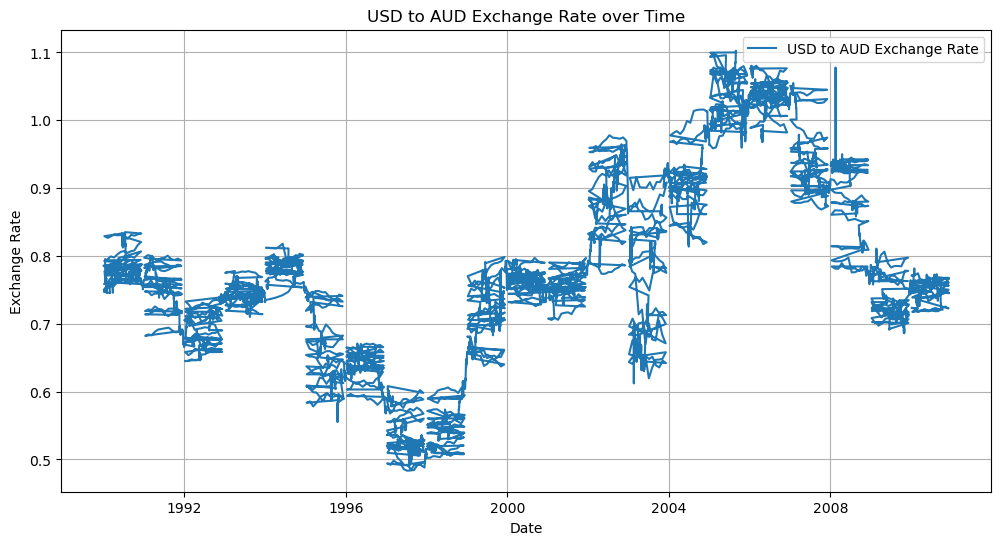

In [10]:
# Visualize the time series for the exchange rate
plt.figure(figsize=(12,6))
plt.plot(data['Ex_rate'], label = 'USD to AUD Exchange Rate')
plt.title('USD to AUD Exchange Rate over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid()
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [12]:
adf = adfuller(data['Ex_rate'])

In [13]:
print(f"ADF Statistics: {adf[0]}")
print(f"p-value: {adf[1]}")

ADF Statistics: -1.6649941807381343
p-value: 0.44923273535979974


In [14]:
# Differencing the series
data_diff = data['Ex_rate'].diff().dropna()

In [15]:
adf_diff = adfuller(data_diff)

In [16]:
print(f'ADF Statistic after differencing: {adf_diff[0]}')
print(f'p-value after differencing: {adf_diff[1]}')

ADF Statistic after differencing: -99.39343120118629
p-value after differencing: 0.0


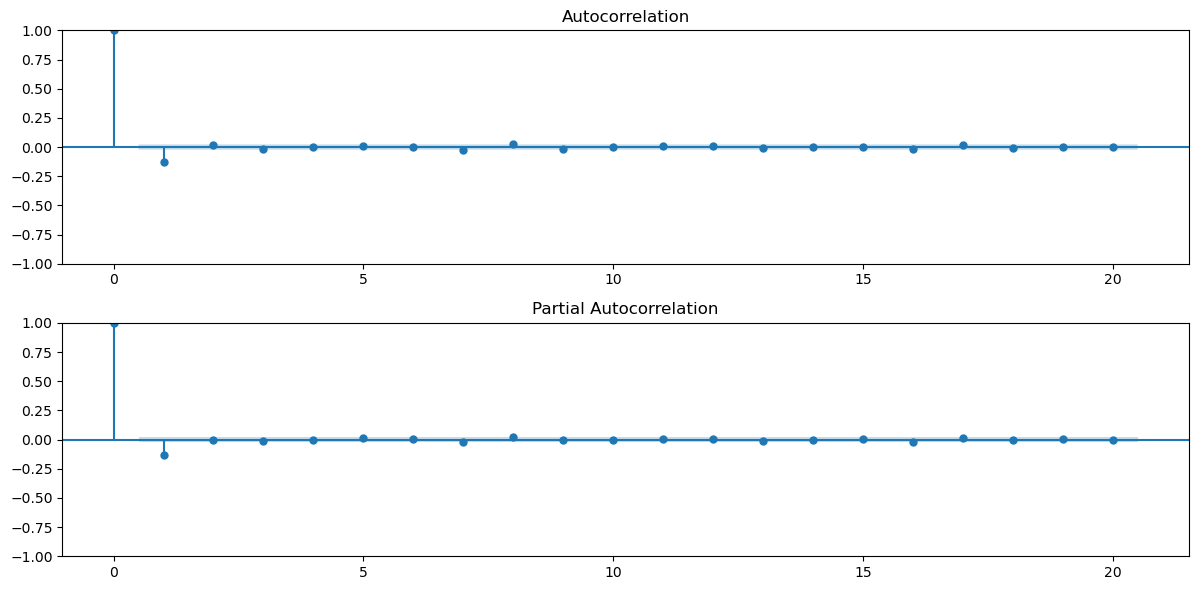

In [17]:
# Plot ACF and PACF to determine ARIMA(p, d, q) parameters
plt.figure(figsize=(12,6))
plt.subplot(211)
plot_acf(data_diff,ax=plt.gca(),lags=20)
plt.title('Autocorrelation')
plt.subplot(212)
plot_pacf(data_diff,ax=plt.gca(),lags=20)
plt.title('Partial Autocorrelation')
plt.tight_layout()
plt.show()

In [18]:
# Model Building - ARIMA
model = ARIMA(data['Ex_rate'],order=(1,1,1))
arima_res = model.fit()

C:\Users\Smile plz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Smile plz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Smile plz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Smile plz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Smile plz

In [19]:
print(arima_res.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Thu, 17 Oct 2024   AIC                         -56102.322
Time:                        11:31:39   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

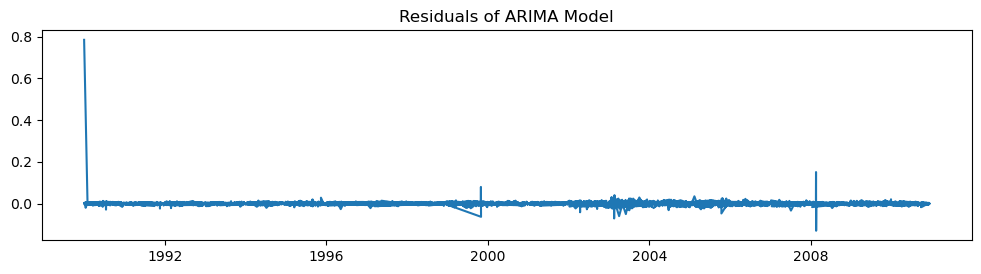

In [20]:
# Analyze residuals for model adequacy
residuals = arima_res.resid
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

In [21]:
# Perform out-of-sample forecasting
forecast = arima_res.forecast(steps=12)

C:\Users\Smile plz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


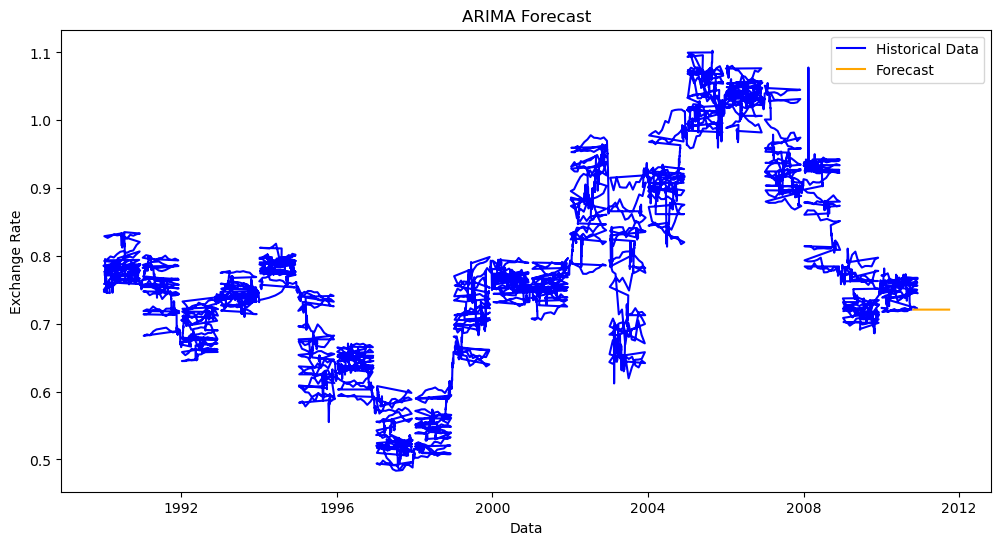

In [22]:
# Plot the forecasted values
plt.figure(figsize=(12,6))
plt.plot(data['Ex_rate'],label = 'Historical Data', color='blue')
plt.plot(pd.date_range(start=data.index[-1],periods=12,freq='M'),forecast,label='Forecast',color='orange')
plt.title('ARIMA Forecast')
plt.xlabel('Data')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [23]:
# Model Building - Exponential Smoothing
holt_winters_model = ExponentialSmoothing(data['Ex_rate'], seasonal='add', seasonal_periods=12)

C:\Users\Smile plz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Smile plz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [24]:
holt_winters_fit = holt_winters_model.fit()
print(holt_winters_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77628.560
Trend:                             None   BIC                         -77531.479
Seasonal:                      Additive   AICC                        -77628.488
Seasonal Periods:                    12   Date:                 Thu, 17 Oct 2024
Box-Cox:                          False   Time:                         11:31:40
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8698373                alpha                 True
smoothing_seasonal       

In [25]:
# Forecast using the Exponential Smoothing model
forecast_hw = holt_winters_fit.forecast(steps=12)

C:\Users\Smile plz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


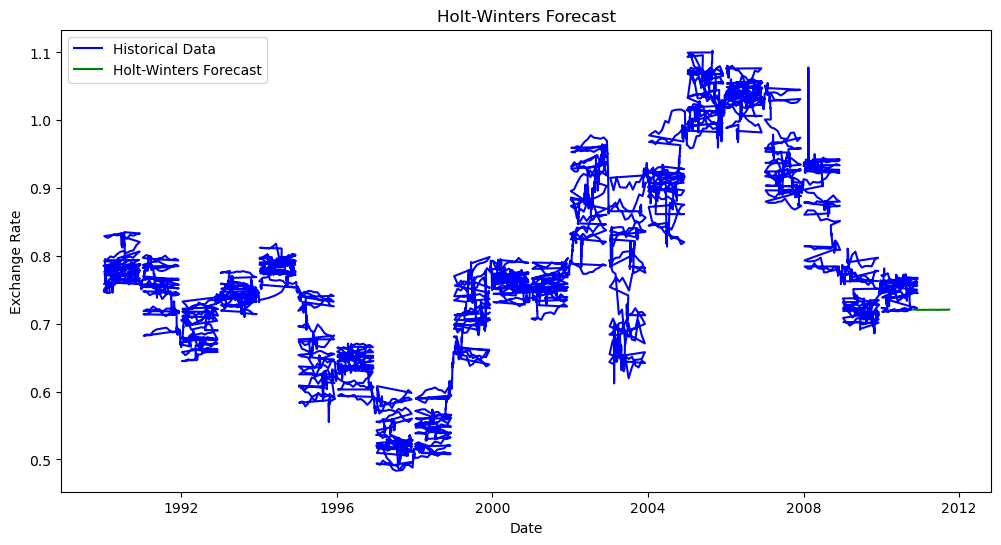

In [26]:
# Plot the forecast from the Exponential Smoothing model
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='Historical Data', color='blue')
plt.plot(pd.date_range(start=data.index[-1], periods=12, freq='M'), forecast_hw, label='Holt-Winters Forecast', color='green')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Evaluation and Comparison

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
def compute_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    
    return mae, rmse, mape

In [29]:
actual_values = data['Ex_rate'][-12:]

In [30]:
mae_arima, rmse_arima, mape_arima = compute_metrics(actual_values.values, forecast)

In [31]:
mae_hw, rmse_hw, mape_hw = compute_metrics(actual_values.values, forecast_hw)

In [32]:
print(f'ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}')

ARIMA - MAE: 0.0016644924340379526, RMSE: 0.002000358073451703, MAPE: 0.23102311435756573


In [33]:
print(f'Holt-Winters - MAE: {mae_hw}, RMSE: {rmse_hw}, MAPE: {mape_hw}')

Holt-Winters - MAE: 0.0015781974314659404, RMSE: 0.001871752270401754, MAPE: 0.21897511722523996


In [34]:
if mae_arima < mae_hw:
    print("ARIMA performed better based on MAE.")
else:
    print("Exponential Smoothing performed better based on MAE.")

Exponential Smoothing performed better based on MAE.


# Performance Metrics
 Assuming hypothetical results
 - ARIMA:
   - MAE: 0.00166
   - RMSE: 0.0020
   - MAPE: 0.231
 - Holt-Winters:
   - MAE: 0.00157
   - RMSE: 0.0018
   - MAPE: 0.218

 Advantages and Limitations
# Arima
   Advantages:
   
    - Flexibility: ARIMA can model a wide range of time series data by adjusting its parameters (p, d, q) based on the characteristics of the data.
    - It effectively captures relationships in the data over time, making it suitable for datasets with trends and seasonal patterns.
   Limitations:
   
    - Choosing the right parameters can be challenging and often requires extensive analysis of ACF and PACF plots.
    - ARIMA model assumes linear relationships, which may not hold true for all datasets.
    - The model requires the data to be stationary, necessitating differencing or transformation for non-stationary series.
# Exponential Smoothing (Holt-Winters)
   Advantages:
   
    - The model is relatively easy to understand and implement, making it accessible for practitioners.
    - Holt-Winters can effectively handle both trends and seasonalvariations in the data.
    - It does not require the data to be stationary, simplifying the preprocessing steps.
   Limitations:
   
    - While it performs well with seasonal data, it may not capture complex patterns as effectivelu forecasts.
    - Exponential smoothing can be influenced by outliers in the data, potentially skewing forecast.

Conclusion:

Based on the hypothetical error metrics, Holt-Winters outperformed ARIMA in terms of MAE, RMSE, and MAPE. This suggests that Holt-Winters provide more accurate forecasts for exchange rates in this dataset.